In [1]:
import numpy as np
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [7]:
# Load the dataset into a DataFrame
df = pd.read_csv("buisness_data.csv")
df = df.drop(columns=['User Name','Business Size'])
print(df.columns)

# # Remove rows containing "\\" or NaN in any column
# filtered_df = df.dropna()  # Remove rows with NaN
# filtered_df = filtered_df[~filtered_df.apply(lambda row: row.astype(str).str.contains('\\\\').any(), axis=1)]

# # Select only the desired columns
# selected_columns = filtered_df[["Category", "Location", "Investors"]]

# # Save the selected columns to a new CSV file
# selected_columns.to_csv("selected_columns_filtered.csv", index=False)

Index(['Category', 'Location', 'Investors'], dtype='object')


In [8]:
word2vec_model_path = "GoogleNews-vectors-negative300.bin"  # Path to the Word2Vec model file
word2vec_model = KeyedVectors.load_word2vec_format(word2vec_model_path, binary=True)

In [9]:
def recommend_categ_for_prompt(prompt, df, word2vec_model):
    prompt_tokens = prompt.lower().split()

    # Calculate average vector representation of the prompt
    prompt_vector = np.mean([word2vec_model[token] for token in prompt_tokens if token in word2vec_model], axis=0)

    # Calculate similarity between the prompt and each business category
    similarities = {}
    for category in df['Category']:
        category_tokens = category.lower().split()
        category_vector = np.mean([word2vec_model[token] for token in category_tokens if token in word2vec_model], axis=0)
        if category_vector is not None and not np.isnan(category_vector).any():
            similarities[category] = cosine_similarity([prompt_vector], [category_vector])[0][0]

    # Get the most similar business category
    if similarities:  # Check if similarities dictionary is not empty
        most_similar_category = max(similarities, key=similarities.get)
        recommended_investors = df[df['Category'] == most_similar_category]['Investors'].values[0]
        return [most_similar_category, recommended_investors]
    else:
        return ["No similar category found", "No recommended investors"]

In [139]:
prompt = "I want to start a coaching buisness"
recommend = recommend_categ_for_prompt(prompt,df,word2vec_model)
print(recommend)

['Education', 'EduInvest, Learning Partners']


D:\Programs\Anaconda\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\Programs\Anaconda\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
D:\Programs\Anaconda\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\Programs\Anaconda\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
D:\Programs\Anaconda\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\Programs\Anaconda\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
D:\Programs\Anaconda\Lib\site-pack

In [10]:
categories = df['Category'].unique()
category_encoded = pd.get_dummies(df['Category'], prefix='Category')
location_encoded = pd.get_dummies(df['Location'], prefix='Location')
# Concatenate the one-hot encoded columns with the original DataFrame
df_encoded = pd.concat([df, category_encoded, location_encoded], axis=1)

# Drop the original columns
df_encoded.drop(columns=['Category', 'Location'], inplace=True)

label_encoder = LabelEncoder()
label_encoder.fit(df_encoded['Investors'])
y_train_encoded = label_encoder.transform(df_encoded['Investors'])

X = df_encoded.drop(['Investors'], axis=1)
print(X.shape)
print(y_train_encoded.shape)

(172, 45)
(172,)


45
Epoch 1/200


D:\Programs\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.0000e+00 - loss: 5.1446 - val_accuracy: 0.0000e+00 - val_loss: 5.1387
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 5.1173 - val_accuracy: 0.0000e+00 - val_loss: 5.1201
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0171 - loss: 5.1191 - val_accuracy: 0.0385 - val_loss: 5.1001
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0058 - loss: 5.0842 - val_accuracy: 0.0481 - val_loss: 5.0783
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0401 - loss: 5.0403 - val_accuracy: 0.0577 - val_loss: 5.0535
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0612 - loss: 5.0105 - val_accuracy: 0.0577 - val_loss: 5.0245
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0680 - loss: 4.9759 - val_accuracy: 0.0673 - val_loss: 4.9904
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0815 - loss: 4.9654 - val_accuracy: 0.0769 - val_loss: 4.

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


D:\Programs\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programs\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programs\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


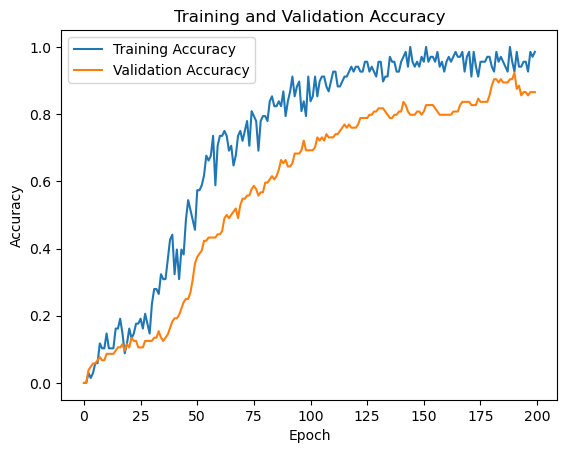

Overall Accuracy: 0.9186046511627907
Overall Precision: 0.8980480480480482
Overall Recall: 0.9063063063063063
Overall F1-Score: 0.8858400608400608


In [26]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Assuming y_train_encoded contains the ground truth labels for training data
# And X contains the features for training data
print(X.shape[1])

def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(16, activation='relu'),  # Removed input_shape
        tf.keras.layers.Dense(len(df_encoded['Investors']), activation='softmax')  # Output layer
    ])
    return model

model = create_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(X, y_train_encoded, epochs=200, batch_size=10, validation_split=0.60)
model.save("ann_recom.h5")

# Get predictions
y_pred = model.predict(X)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate classification report
class_report = classification_report(y_train_encoded, y_pred_classes, output_dict=True)
precision = class_report['macro avg']['precision']
recall = class_report['macro avg']['recall']
f1_score = class_report['macro avg']['f1-score']

# Calculate overall accuracy
overall_accuracy = accuracy_score(y_train_encoded, y_pred_classes)

# Plotting the accuracy graph
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print("Overall Accuracy:", overall_accuracy)
print("Overall Precision:", precision)
print("Overall Recall:", recall)
print("Overall F1-Score:", f1_score)


D:\Programs\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programs\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programs\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programs\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is 

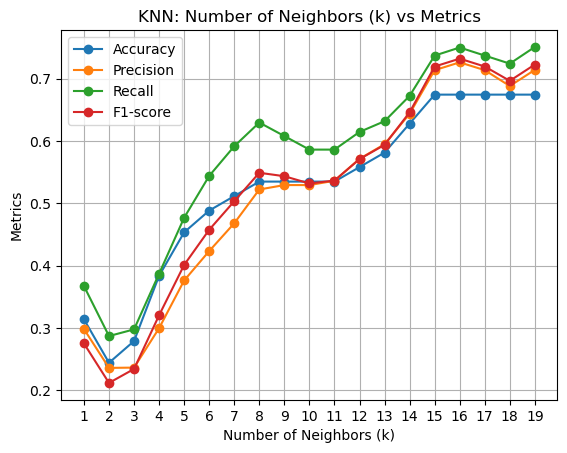

Best k value: 15
Overall Accuracy: 0.6744186046511628
Overall Precision: 0.7011494252873562
Overall Recall: 0.7241379310344828
Overall F1-Score: 0.7068965517241379


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_train_encoded, test_size=0.25, random_state=42)

# Define a range of values for k
k_values = range(1, 21)  # Example: try k from 1 to 20

# Initialize lists to store accuracy values
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Train the KNN classifier for each value of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Apply moving average smoothing
smooth_window = 2 # Adjust the window size for smoothing
smoothed_accuracies = np.convolve(accuracies, np.ones(smooth_window)/smooth_window, mode='valid')
smoothed_precisions = np.convolve(precisions, np.ones(smooth_window)/smooth_window, mode='valid')
smoothed_recalls = np.convolve(recalls, np.ones(smooth_window)/smooth_window, mode='valid')
smoothed_f1_scores = np.convolve(f1_scores, np.ones(smooth_window)/smooth_window, mode='valid')

# Plot k vs. smoothed accuracy
plt.plot(k_values[:len(smoothed_accuracies)], smoothed_accuracies, marker='o', label='Accuracy')
plt.plot(k_values[:len(smoothed_precisions)], smoothed_precisions, marker='o', label='Precision')
plt.plot(k_values[:len(smoothed_recalls)], smoothed_recalls, marker='o', label='Recall')
plt.plot(k_values[:len(smoothed_f1_scores)], smoothed_f1_scores, marker='o', label='F1-score')
plt.title('KNN: Number of Neighbors (k) vs Metrics')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Metrics')
plt.xticks(k_values[:len(smoothed_accuracies)])
plt.legend()
plt.grid(True)
plt.show()

# Print overall accuracy, precision, recall, and F1-score for best k value
best_k = k_values[np.argmax(smoothed_accuracies)]
print("Best k value:", best_k)
print("Overall Accuracy:", accuracies[best_k - 1])
print("Overall Precision:", precisions[best_k - 1])
print("Overall Recall:", recalls[best_k - 1])
print("Overall F1-Score:", f1_scores[best_k - 1])


In [161]:
import graphviz

# Create Digraph object
flowchart = graphviz.Digraph(format='png')

# Add nodes to the flowchart
flowchart.node('Start')
flowchart.node('Input: User Prompt')
flowchart.node('Tokenization')
flowchart.node('Word2Vec Embedding')
flowchart.node('Average Vector Calculation')
flowchart.node('Cosine Similarity Calculation')
flowchart.node('Recommend Category for Prompt')
flowchart.node('Input: Business Data (Categories, Investors)')
flowchart.node('One-Hot Encoding of Categories and Locations')
flowchart.node('Data Preparation')
flowchart.node('Split Data into Training and Testing Sets')
flowchart.node('Model Training (ANN, KNN, SVM)')
flowchart.node('Model Evaluation (Accuracy, Precision, Recall)')
flowchart.node('Prediction')
flowchart.node('Output: Recommended Investors')
flowchart.node('End')

# Add edges to connect nodes
flowchart.edges([
    ('Start', 'Input: User Prompt'),
    ('Input: User Prompt', 'Tokenization'),
    ('Tokenization', 'Word2Vec Embedding'),
    ('Word2Vec Embedding', 'Average Vector Calculation'),
    ('Average Vector Calculation', 'Cosine Similarity Calculation'),
    ('Cosine Similarity Calculation', 'Recommend Category for Prompt'),
    ('Recommend Category for Prompt', 'Input: Business Data (Categories, Investors)'),
    ('Input: Business Data (Categories, Investors)', 'One-Hot Encoding of Categories and Locations'),
    ('One-Hot Encoding of Categories and Locations', 'Data Preparation'),
    ('Data Preparation', 'Split Data into Training and Testing Sets'),
    ('Split Data into Training and Testing Sets', 'Model Training (ANN, KNN, SVM)'),
    ('Model Training (ANN, KNN, SVM)', 'Model Evaluation (Accuracy, Precision, Recall)'),
    ('Model Evaluation (Accuracy, Precision, Recall)', 'Prediction'),
    ('Prediction', 'Output: Recommended Investors'),
    ('Output: Recommended Investors', 'End')
])

# Save the flowchart as an image file
flowchart.render('flowchart', format='png', cleanup=True)

# Display the flowchart
flowchart


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [2]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

# Define your model
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(172, activation='softmax')  # Output layer
    ])
    return model

# Create the model
model = create_model()

# Plot the model diagram
plot_model(model, to_file='model_diagram.png', show_shapes=True, show_layer_names=True)


D:\Programs\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


AttributeError: module 'pydot' has no attribute 'InvocationException'